open source soltution

In [17]:
import rasterio as rio
import geopandas as gpd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from rasterio.plot import show

%matplotlib inline

In [18]:
#change these variables for each runthru
phase = "P03"
wshed = "EGM"
flight = int(phase[-1:])

field_data_list = {"VAN" : r"H:\Metro-Van\2021\GIS\field_points\VAN_all.shp", "EGM" : r"Y:\Englishman\2021\Field_Survey_data\published\EGM_all.shp"}
SD_list = {"VAN" : r"H:\Metro-Van\2021\GIS\snow_depth_rasters\VAN_"+ phase + "_coregSD.tif",
           "EGM" : r"Y:\Englishman\2021\DEMs\raw_SD\EGM_" + phase + "_SD_raw.tif"}

out_direct_list = {"VAN" : r"H:\Metro-Van\2021\Analysis\field_validation\feb2_coreg",
                   "EGM" : r"Y:\Englishman\2021\Analysis\field_validation"}
field_data = field_data_list[wshed]
snow_depth = SD_list[wshed]
out_direct = out_direct_list[wshed]

#checks
display("flight: " + str(flight))
display(field_data)
display(snow_depth)
#out_direct_sum = os.path.join(r"H:\Metro-Van\2021\Analysis\field_validation\rev_jan27_nocoreg", "VAN_" + phase + "_lidar_summary.csv")

'flight: 3'

'Y:\\Englishman\\2021\\Field_Survey_data\\published\\EGM_all.shp'

'Y:\\Englishman\\2021\\DEMs\\raw_SD\\EGM_P03_SD_raw.tif'

In [19]:
# Read points from shapefile
pts = gpd.read_file(field_data)
#pts = pts.drop(columns=["phase"])
pts = pts[pts["aco_flight"] == flight]
display(pts["aco_flight"].dtype)

pts.index = range(len(pts))
display(pts.index)
coords = [(x,y) for x,y in zip(pts.easting, pts.northing)]
display(coords)
display(pts)


dtype('int64')

RangeIndex(start=0, stop=371, step=1)

[(386896.521, 5451204.528),
 (386896.521, 5451204.528),
 (385876.355, 5451804.842),
 (385876.355, 5451804.842),
 (387179.468, 5451541.403),
 (387179.468, 5451541.403),
 (385548.621, 5451949.644),
 (385732.998, 5451525.039),
 (385807.369, 5451287.001),
 (385807.369, 5451287.001),
 (386566.412, 5450763.019),
 (386566.412, 5450763.019),
 (385465.967, 5452079.282),
 (386818.185, 5451222.384),
 (385447.085, 5452268.778),
 (385447.085, 5452268.778),
 (385548.621, 5451949.644),
 (385732.998, 5451525.039),
 (385732.998, 5451525.039),
 (386566.412, 5450763.019),
 (385465.967, 5452079.282),
 (386906.521, 5451204.528),
 (386906.521, 5451204.528),
 (385886.355, 5451804.842),
 (385886.355, 5451804.842),
 (387189.468, 5451541.403),
 (387189.468, 5451541.403),
 (385457.085, 5452268.778),
 (385558.621, 5451949.644),
 (385742.998, 5451525.039),
 (385742.998, 5451525.039),
 (385817.369, 5451287.001),
 (385817.369, 5451287.001),
 (386576.412, 5450763.019),
 (385475.967, 5452079.282),
 (386828.185, 545122

,Field1,aco_flight,plot_datet,study_area,plot_id,plot_type,cardinal,distance,multi_core,depth,...,canopy_cov,canopy_den,canopy_hei,slope,aspect_typ,cover_type,elevation_,swe_189,density_18,geometry
0,0,3,2021-04-23,Englishman,E3F,Cardinal 10 m,Centre,0.0,no,247,...,100.0,73.699997,11.0,14.0,East,under_canopy,0.0,121.189621,0.490646,POINT (386896.521 5451204.528)
1,1,3,2021-04-23,Englishman,E3F,Cardinal 10 m,Centre,0.0,None,201,...,100.0,73.699997,11.0,14.0,East,under_canopy,0.0,0.000000,0.000000,POINT (386896.521 5451204.528)
2,2,3,2021-04-22,Englishman,E2A,Cardinal 10 m,Centre,0.0,None,249,...,0.0,0.000000,0.0,14.0,East,open,0.0,0.000000,0.000000,POINT (385876.355 5451804.842)
3,3,3,2021-04-22,Englishman,E2A,Cardinal 10 m,Centre,0.0,no,245,...,0.0,0.000000,0.0,14.0,East,open,0.0,119.407421,0.487377,POINT (385876.355 5451804.842)
4,4,3,2021-04-23,Englishman,S4CC,Cardinal 10 m,Centre,0.0,None,128,...,0.0,0.000000,0.0,20.0,South,open,0.0,0.000000,0.000000,POINT (387179.468 5451541.403)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,368,3,2021-04-23,Englishman,N2F,None,SE,10.0,None,244,...,0.0,0.000000,0.0,7.0,Northwest,open,0.0,0.000000,0.000000,POINT (386566.412 5450763.019)
367,369,3,2021-04-23,Englishman,N2F,None,E,10.0,no,293,...,0.0,0.000000,0.0,7.0,Northwest,open,0.0,106.040918,0.361914,POINT (386566.412 5450763.019)
368,370,3,2021-04-23,Englishman,W3F,None,None,7.5,None,181,...,0.0,0.000000,0.0,19.0,Northwest,open,0.0,0.000000,0.000000,POINT (386818.185 5451222.384)
369,371,3,2021-04-23,Englishman,W3F,None,Centre,0.0,no,195,...,0.0,0.000000,0.0,19.0,Northwest,open,0.0,88.218915,0.452405,POINT (386818.185 5451222.384)


In [20]:
# Open the raster and store metadata
src = rio.open(snow_depth)
display(src)


<open DatasetReader name='Y:/Englishman/2021/DEMs/raw_SD/EGM_P03_SD_raw.tif' mode='r'>

In [21]:
#for metro
pts.rename(columns={"snow_depth": "depth"}, inplace=True)
pts.replace({'plot_type': {'Cardinal 10 m':"Cardinal_10m",'cardinal_10m':"Cardinal_10m"}}, inplace = True)

pts["lidar"] = [x[0] for x in src.sample(coords)]
pts["lidar"]= round(pts["lidar"]*100)

pts["probe - lidar"] = pts["depth"]-pts["lidar"]
display(pts)
display(pts.plot_type.unique())



display(pts.plot_type.unique())

,Field1,aco_flight,plot_datet,study_area,plot_id,plot_type,cardinal,distance,multi_core,depth,...,canopy_hei,slope,aspect_typ,cover_type,elevation_,swe_189,density_18,geometry,lidar,probe - lidar
0,0,3,2021-04-23,Englishman,E3F,Cardinal_10m,Centre,0.0,no,247,...,11.0,14.0,East,under_canopy,0.0,121.189621,0.490646,POINT (386896.521 5451204.528),217.0,30.0
1,1,3,2021-04-23,Englishman,E3F,Cardinal_10m,Centre,0.0,None,201,...,11.0,14.0,East,under_canopy,0.0,0.000000,0.000000,POINT (386896.521 5451204.528),217.0,-16.0
2,2,3,2021-04-22,Englishman,E2A,Cardinal_10m,Centre,0.0,None,249,...,0.0,14.0,East,open,0.0,0.000000,0.000000,POINT (385876.355 5451804.842),248.0,1.0
3,3,3,2021-04-22,Englishman,E2A,Cardinal_10m,Centre,0.0,no,245,...,0.0,14.0,East,open,0.0,119.407421,0.487377,POINT (385876.355 5451804.842),248.0,-3.0
4,4,3,2021-04-23,Englishman,S4CC,Cardinal_10m,Centre,0.0,None,128,...,0.0,20.0,South,open,0.0,0.000000,0.000000,POINT (387179.468 5451541.403),149.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,368,3,2021-04-23,Englishman,N2F,None,SE,10.0,None,244,...,0.0,7.0,Northwest,open,0.0,0.000000,0.000000,POINT (386566.412 5450763.019),260.0,-16.0
367,369,3,2021-04-23,Englishman,N2F,None,E,10.0,no,293,...,0.0,7.0,Northwest,open,0.0,106.040918,0.361914,POINT (386566.412 5450763.019),260.0,33.0
368,370,3,2021-04-23,Englishman,W3F,None,None,7.5,None,181,...,0.0,19.0,Northwest,open,0.0,0.000000,0.000000,POINT (386818.185 5451222.384),203.0,-22.0
369,371,3,2021-04-23,Englishman,W3F,None,Centre,0.0,no,195,...,0.0,19.0,Northwest,open,0.0,88.218915,0.452405,POINT (386818.185 5451222.384),203.0,-8.0


array(['Cardinal_10m', None], dtype=object)

array(['Cardinal_10m', None], dtype=object)

In [22]:
#export the lidar dataset
os.chdir(out_direct)
name = wshed + "_" + phase + "_lidar.csv"
pts.to_csv(name, index=False)

In [23]:
#create summary tables of the plots 
pts =  pts.dropna(subset=["lidar"])
sum = pts.groupby(
    ["plot_id", "aco_flight"]).agg({
    "depth": ["mean", "std"],
    "lidar": ["mean", "std"],
    "probe - lidar" : "mean",
    "slope": "mean",
    "canopy_cov": "mean"
}).round(2)
display(sum)
name = "summary_" + name
sum.to_csv(name,index=True)

depth              lidar        probe - lidar  slope  \
                      mean    std        mean    std          mean   mean   
plot_id aco_flight                                                          
E1A     3           352.11  59.18  370.660004  52.70        -18.55   9.61   
E2A     3           281.37  28.36  282.660004  25.47         -1.29  13.26   
E3F     3           211.66  34.28  229.250000  34.95        -17.59  14.59   
N1A     3           289.42  31.73  295.649994  33.84         -6.22  14.60   
N2F     3           247.32  52.37  244.919998  27.66          2.39  10.76   
S1A     3           302.61  39.69  295.869995  32.80          6.74   8.29   
S2A     3           278.26  26.99  275.079987  19.56          3.18   4.49   
S3F     3           197.66  24.26  216.759995  37.98        -19.11  21.79   
S4CC    3           169.82  54.84  213.089996  68.01        -43.26  19.76   
W3F     3           197.03  36.14  201.059998  28.37         -4.03  17.39   

                   canopy_cov  
                         mean  
plot_id aco_flight             
E1A     3                2.18  
E2A     3                0.00  
E3F     3               34.44  
N1A     3                0.00  
N2F     3               36.42  
S1A     3               64.39  
S2A     3                4.28  
S3F     3               41.45  
S4CC    3                1.79  
W3F     3               65.33

PermissionError: [Errno 13] Permission denied: 'summary_EGM_P03_lidar.csv'

In [24]:
#set up df for graphing results
plot_type = "Cardinal_10m"
df = pts[pts["plot_type"] == plot_type]
df = df.rename(columns={"depth" : "field", "aco_flight" : "phase"})
df = df.rename(columns={"depth" : "field"})

print(type(df))
#melt columns
df=df.melt(id_vars=["plot_id", "cardinal", "distance", "phase", "cover_type"], value_vars=["field", "lidar"], var_name="depth_type", value_name="snow_depth")
df["id"]= df["cardinal"]+df["distance"].astype(str)
display(df)

<class 'geopandas.geodataframe.GeoDataFrame'>


,plot_id,cardinal,distance,phase,cover_type,depth_type,snow_depth,id
0,E3F,Centre,0.0,3,under_canopy,field,247.0,Centre0.0
1,E3F,Centre,0.0,3,under_canopy,field,201.0,Centre0.0
2,E2A,Centre,0.0,3,open,field,249.0,Centre0.0
3,E2A,Centre,0.0,3,open,field,245.0,Centre0.0
4,S4CC,Centre,0.0,3,open,field,128.0,Centre0.0
...,...,...,...,...,...,...,...,...
725,S2A,SE,7.5,3,open,lidar,257.0,SE7.5
726,S3F,SE,7.5,3,open,lidar,213.0,SE7.5
727,N2F,SE,7.5,3,under_canopy,lidar,196.0,SE7.5
728,E1A,SE,7.5,3,open,lidar,328.0,SE7.5


E3F
212.32258064516128
229.6451612903226
E2A
281.36842105263156
282.6578947368421
S4CC
169.8235294117647
213.08823529411765
S1A
302.60526315789474
295.86842105263156
S2A
278.2564102564103
275.0769230769231
S3F
197.6578947368421
216.76315789473685
N2F
246.13888888888889
244.08333333333334
E1A
355.94594594594594
369.5135135135135
W3F
197.55882352941177
200.94117647058823
N1A
289.425
295.65


<Figure size 432x288 with 0 Axes>

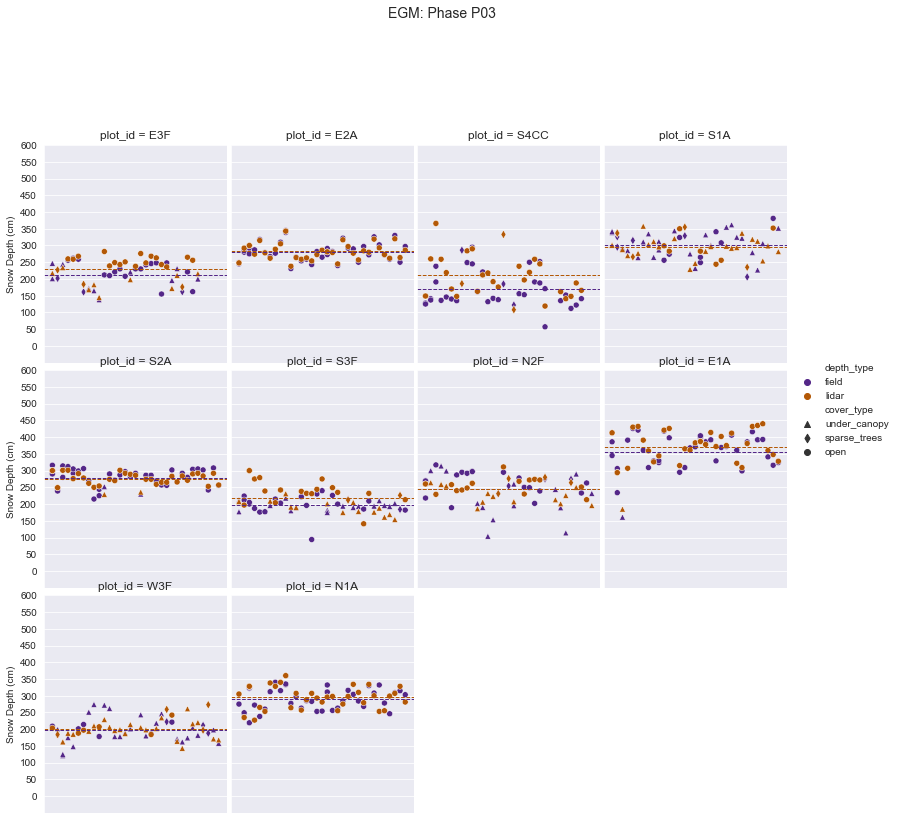

In [25]:
#set up graph
sns.set_style("darkgrid")
sns.despine(left=True)


#set font sizes
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title




g = sns.FacetGrid(df, col="plot_id", col_wrap=4, height = 4, aspect = .7)
g.set(ylim=(-50, 500), yticks=[0,50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])


for col, col_name in enumerate(g.col_names):
    print(col_name)
    ax = g.axes[col]
    filter = df[df["plot_id"] == col_name]
    groupby = filter.groupby(["depth_type"],as_index=False).snow_depth.mean()
    field_avg = groupby[groupby["depth_type"] == "field"]
    lidar_avg = groupby[groupby["depth_type"] == "lidar"]
    field_avg_pos = field_avg["snow_depth"].values[0]
    lidar_avg_pos = lidar_avg["snow_depth"].values[0]
    print(field_avg_pos)
    print(lidar_avg_pos)
    ax.axhline(field_avg_pos, color="#542788", ls="--", lw=1)
    ax.xaxis.grid(False)
    #txkw = dict(size=12)
    #tx =
    #ax.text(10,200, tx, c="#542788")
    ax.axhline(lidar_avg_pos, color="#b35806", ls="--", lw=1)


hue_order = ["field", "lidar"]
# Field is purple, Lidar is orange
palette = {"field" : "#542788", "lidar":"#b35806"}
markers = {"open":"o", "sparse_trees" : "d", "under_canopy" : "^"}
#markers = {"open":"o","under_canopy" : "^"}
#markers = ["o","d", "^","^"]
g = g.map_dataframe(sns.scatterplot, "id", "snow_depth", hue="depth_type", style="cover_type", markers = markers, hue_order = hue_order, palette = palette)
g = g.set(xticklabels=[], xlabel=None)
g.set_ylabels(size = 10, label = "Snow Depth (cm)")
g = g.add_legend()


plt.suptitle(wshed + ": Phase " + str(phase))
plt.subplots_adjust(hspace=0.035, wspace=0.02, top=.82)
os.chdir(out_direct)
plt.savefig(wshed + phase + ".png")
plt.show()